In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import Dense , layers , Conv@D

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [27]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data  = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [28]:
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_data.shape

(42000, 785)

In [30]:
type(train_data) , type(test_data)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [31]:
train_data['pixel0'].value_counts()

0    42000
Name: pixel0, dtype: int64

In [32]:
frames = []
for i in range(784):
    frames.append(train_data.columns[i])
    
# now we will concate the pixels

# train_data_1 = pd.concat(frames,axis =1)

In [33]:
pixels = train_data.iloc[:,1:785]
label = train_data['label']

In [34]:
pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# pixels.reshape(len(pixels),28,28)
pix = np.array(pixels)
pix = pix.reshape(len(pixels),28,28,1)


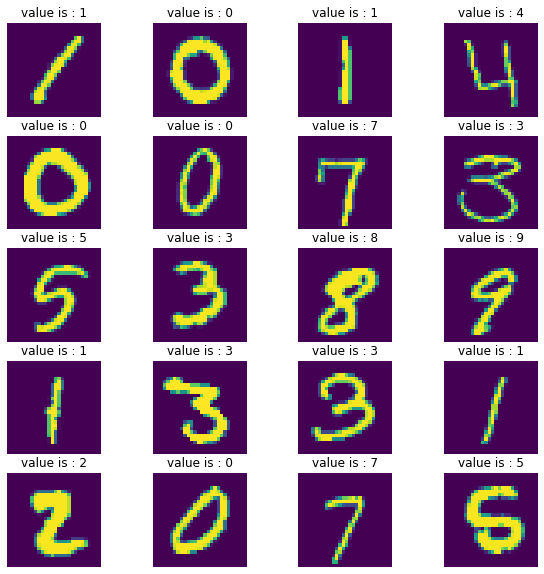

In [36]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(pix[i])
    plt.axis('off')
    plt.title("value is : {}".format(label[i]))

In [37]:
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(pix,label,test_size = .20,random_state = 42)

In [40]:
y_train.value_counts()

1    3775
7    3508
3    3414
6    3352
9    3350
2    3331
0    3316
4    3233
8    3228
5    3093
Name: label, dtype: int64

In [41]:
# now we will create the convolution model
# first we will import some keras library 
from keras import layers , models
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D 
from keras.preprocessing.image import *

# lets define a ImageDataGenerator object
# change the arguments below as per the requirment
idg = ImageDataGenerator(
                                     horizontal_flip = True,
                                     rotation_range = 30,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     brightness_range=[0.2,1.0],
                                     zoom_range=[0.5,1.0]
                         )
data_augmentation =  keras.Sequential([
    layers.RandomRotation(0.22),
    layers.RandomFlip('horizontal',input_shape = (28,28,1)),
    layers.RandomZoom(0.1)

    
])

In [46]:
model = models.Sequential([
    #data_augmentation,
   # idg,
    layers.Conv2D(filters = 60 , kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 100 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),
   #layers.Dropout(0.12),
    layers.Conv2D(filters = 100 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D((2,2)),

    
    # ann model
    
    layers.Flatten(),
    layers.Dense(1800,activation = 'relu'),
    layers.Dense(800,activation = 'relu'),
    layers.Dense(800,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')    
                         ])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1050/1050 [==============================] - 73s 40ms/step - loss: 0.3199 - accuracy: 0.9145
Epoch 2/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.1212 - accuracy: 0.9666
Epoch 3/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.1077 - accuracy: 0.9720
Epoch 4/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0868 - accuracy: 0.9770
Epoch 5/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0884 - accuracy: 0.9781
Epoch 6/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.0695 - accuracy: 0.9824
Epoch 7/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0619 - accuracy: 0.9848
Epoch 8/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.0557 - accuracy: 0.9846
Epoch 9/10
 446/1050 [===========>..................] - ETA: 23s - loss: 0.0615 - accuracy: 0.9854

In [ ]:
y_pred = model.predict(x_test)
y_predict = [np.argmax(y_pred[i]) for i in range(len(y_pred))]

In [ ]:
y_pred.shape 

In [ ]:
y_list = y_test.to_list()
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title(f'actual value : {y_list[i]} \n predicted value is : {y_predict[i]}')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model.fit(pix,
          label,
          epochs=20,
          batch_size = 64,
          callbacks = callbacks)

In [ ]:
test_data = np.array(test_data)
test_data = test_data.reshape(len(test_data),28,28,1)

In [ ]:
result = model.predict(test_data)
predicted_val = [np.argmax(result[i]) for i in range(len(result))]

In [ ]:
predicted_dataframe = pd.DataFrame(predicted_val,columns = ['Label'])

In [ ]:
id = []
for i in range(1,len(predicted_dataframe)+1):
    id.append(i)
imageid = pd.DataFrame(id,columns=['Imageid'])

In [ ]:
final_prediction = pd.concat([imageid,predicted_dataframe],ignore_index = False,axis =1)
final_prediction.reset_index(drop=True, inplace=True)
final_prediction.head()

In [ ]:
final_prediction.to_csv('DigitRecognizer_model_1.csv',index=False)